## Multi class text classification

Ref:- https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [8]:
df = pd.read_csv("Consumer_Complaints.csv")
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/04/2019,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,NaN,NaN,Riverwalk Financial Corporation,SC,294XX,Servicemember,NaN,Web,03/04/2019,In progress,Yes,NaN,3169117
1,03/04/2019,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Problem with customer service,NaN,NaN,AES/PHEAA,VA,245XX,NaN,NaN,Web,03/04/2019,Closed with explanation,Yes,NaN,3168853
2,03/04/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,NAVY FEDERAL CREDIT UNION,AL,36609,NaN,NaN,Web,03/04/2019,In progress,Yes,NaN,3168437
3,03/04/2019,Debt collection,Medical debt,False statements or representation,Attempted to collect wrong amount,NaN,NaN,"AMCOL Systems, Inc.",KS,NaN,NaN,NaN,Web,03/04/2019,Closed with explanation,Yes,NaN,3169019
4,03/04/2019,Vehicle loan or lease,Loan,Getting a loan or lease,Fraudulent loan,NaN,NaN,MERCEDES BENZ FINANCIAL SERVICES,CA,94062,NaN,NaN,Web,03/04/2019,In progress,Yes,NaN,3167841


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230079 entries, 0 to 1230078
Data columns (total 18 columns):
Date received                   1230079 non-null object
Product                         1230079 non-null object
Sub-product                     994913 non-null object
Issue                           1230079 non-null object
Sub-issue                       705753 non-null object
Consumer complaint narrative    371081 non-null object
Company public response         422286 non-null object
Company                         1230079 non-null object
State                           1211528 non-null object
ZIP code                        1121607 non-null object
Tags                            168067 non-null object
Consumer consent provided?      659223 non-null object
Submitted via                   1230079 non-null object
Date sent to company            1230079 non-null object
Company response to consumer    1230073 non-null object
Timely response?                1230079 non-null obje

### Get non null columns , and filter columns of interest 

In [26]:
columns_of_interest = ["Product", "Consumer complaint narrative"]
df_complaints = df[columns_of_interest]

#remove non null columns 
df_complaints = df_complaints[pd.notnull(df["Consumer complaint narrative"])]
df_complaints.head()

,Product,Consumer complaint narrative
1510,Debt collection,Received a letter in XX/XX/XXXX from Source Re...
1636,Debt collection,"Based on previous complaints, now more than 60..."
1683,Debt collection,I received an alert from XXXX on or about the...
1857,Debt collection,I recently received a copy of my credit report...
1902,Debt collection,I was garnished by a company and they can't pr...


In [20]:
print("Number of non null complaints are - ", df_complaints.shape)

Number of non null complaints are -  (371081, 2)


### Factorize the Product Values into labels

In [42]:
a,b = pd.factorize(df_complaints["Product"], sort=True)
print(b)

Index(['Bank account or service', 'Checking or savings account',
       'Consumer Loan', 'Credit card', 'Credit card or prepaid card',
       'Credit reporting',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Money transfer, virtual currency, or money service',
       'Money transfers', 'Mortgage', 'Other financial service', 'Payday loan',
       'Payday loan, title loan, or personal loan', 'Prepaid card',
       'Student loan', 'Vehicle loan or lease', 'Virtual currency'],
      dtype='object')


In [30]:
df_complaints["category"] = pd.factorize(df_complaints["Product"], sort=True)[0]
df_complaints
df_complaints.head(n=20)


,Product,Consumer complaint narrative,category
1510,Debt collection,Received a letter in XX/XX/XXXX from Source Re...,7
1636,Debt collection,"Based on previous complaints, now more than 60...",7
1683,Debt collection,I received an alert from XXXX on or about the...,7
1857,Debt collection,I recently received a copy of my credit report...,7
1902,Debt collection,I was garnished by a company and they can't pr...,7
1955,Mortgage,According To XXXX XXXX XXXX XXXX XXXX XXXX Is ...,10
2029,Debt collection,This is regarding the purchase of item on XX/X...,7
2101,Debt collection,Received notification of a derogatory error on...,7
2246,"Credit reporting, credit repair services, or o...",To whom it may concern : I went through XXXX X...,6
2488,Checking or savings account,XXXX XXXX refused to open my account located o...,1


### Create Dictionaries

In [36]:
category_id_df = df_complaints[["Product","category"]].drop_duplicates().sort_values("category")
print(type(category_id_df))
print(category_id_df)

<class 'pandas.core.frame.DataFrame'>
                                                  Product  category
461565                            Bank account or service         0
2488                          Checking or savings account         1
461611                                      Consumer Loan         2
461563                                        Credit card         3
3134                          Credit card or prepaid card         4
461567                                   Credit reporting         5
2246    Credit reporting, credit repair services, or o...         6
1510                                      Debt collection         7
3544    Money transfer, virtual currency, or money ser...         8
461579                                    Money transfers         9
1955                                             Mortgage        10
462465                            Other financial service        11
461655                                        Payday loan        12
2909      

In [40]:
category_to_id = dict(category_id_df.values)
print(category_to_id)
print()
id_to_category = dict(category_id_df[["category", "Product"]].values)
print(id_to_category)

{'Bank account or service': 0, 'Checking or savings account': 1, 'Consumer Loan': 2, 'Credit card': 3, 'Credit card or prepaid card': 4, 'Credit reporting': 5, 'Credit reporting, credit repair services, or other personal consumer reports': 6, 'Debt collection': 7, 'Money transfer, virtual currency, or money service': 8, 'Money transfers': 9, 'Mortgage': 10, 'Other financial service': 11, 'Payday loan': 12, 'Payday loan, title loan, or personal loan': 13, 'Prepaid card': 14, 'Student loan': 15, 'Vehicle loan or lease': 16, 'Virtual currency': 17}

{0: 'Bank account or service', 1: 'Checking or savings account', 2: 'Consumer Loan', 3: 'Credit card', 4: 'Credit card or prepaid card', 5: 'Credit reporting', 6: 'Credit reporting, credit repair services, or other personal consumer reports', 7: 'Debt collection', 8: 'Money transfer, virtual currency, or money service', 9: 'Money transfers', 10: 'Mortgage', 11: 'Other financial service', 12: 'Payday loan', 13: 'Payday loan, title loan, or pers

## Check for the distribution between the multiple classes

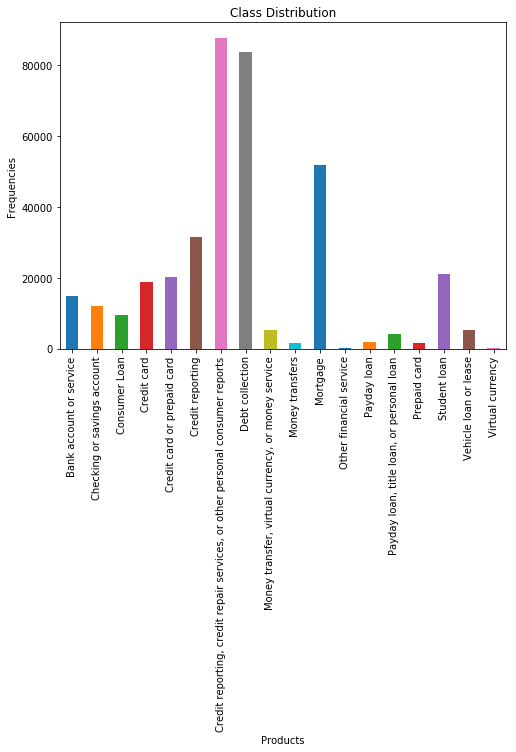

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df_complaints.groupby("Product")["Consumer complaint narrative"].count().plot.bar()
plt.xlabel("Products")
plt.ylabel("Frequencies")
plt.title("Class Distribution")
plt.show()

### Transform text into numerical features for the model